## Estabilidad de la ecuación de advección
**Temas Selectos de Modelación Numérica** <br>
Facultad de Ciencias, UNAM <br>
Semestre 2021-2

En este notebook resolveremos la ecuación de advección numéricamente utilizando diferencias centradas en tiempo y espacio (salto de rana), condiciones de frontera periódicas y una función cosenoidal como condición inicial siguiendo el ejemplo del libro "Basic Numerical Methods in Meteorology and Oceanography" de Kristofer Döös and Peter Lundberg (Capítulo 4). 
Te recomiendo leer el capítulo antes de resolver el notebook.

Al final del notebook encontrarás los ejercicios correpondinetes a la tarea 6. Entrega tu solución a los ejercicios de este notebook junto con los que se hayan dejado en la clase teórica en un notebook en la carpeta de Classroom con el nombre `apellido_nombre_tarea06_ec_adveccion.ipynb`.

In [1]:
# Carga las bibliotecas que utilizaremos
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

La ecuación a resolver es la ecuación de advección en una dimensión espacial:
    $$\frac{\partial u}{\partial t} +c \frac{\partial u}{\partial x}=0 $$

en donde $u=u(x,t)$ y $c$ es la velocidad de fase. 

Usando el esquema de diferencias centradas en timepo y espacio, las derivadas de la ecuación de advección quedan discretizadas como:

$$\frac{u_j^{n+1}-u_j^{n-1}}{2\Delta t}+c\frac{u_{j+1}^{n}-u_{j-1}^{n}}{2\Delta x}=0.$$

Para integrar la ecuación numérica en el tiempo, debemos encontrar una expresión para el "siguente" paso de tiempo $n+1$:

$$u_j^{n+1}=u_j^{n-1}-\mu(u_{j+1}^{n}-u_{j-1}^{n})$$

donde $\mu=\frac{c\Delta t}{\Delta x}$ es el número de Courant (también conocido como CFL).

Para reslver la ecuación primero definimos los parámetros de nuestra malla en tiempo y espacio y generaremos la condición inicial:


$$u_j^{n=0}=\cos{\frac{\pi}{20}(j-50)} \; si \; 40\le j\le 60$$
$$u_j^{n=0}=0 \; si \; j<40 \; o \; j>60,$$

para $j=0,1,2,...,100$ y $n=0,1,2,...,100$.

Usaremos $\Delta t=\Delta x = 1$, $c=1$ que nos dan un CFL de $\mu=1$.

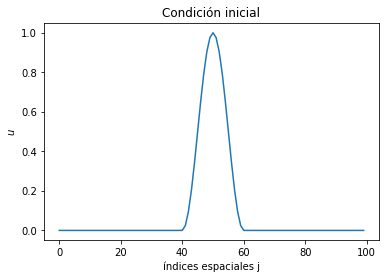

In [2]:
# Inicializacion
c  = 1.0
DT = 1
DX = 1
u = np.zeros(100) # vector de longitud 100 lleno de zeros para guardar la condición inicial

for j in range(-10,10):
    u[j+50] = 0.5*(np.cos(j*np.pi/10)+1)

# Grafica la condición inicial
plt.plot(u)
plt.xlabel('índices espaciales j')
plt.ylabel(r'$u$')
plt.title('Condición inicial')
plt.show()

In [3]:
# Guarda la condicion inicial
u2 = np.zeros((100,100)) # arreglo de 100x100 donde guardaremos la solución
u2[0,:] = u # asignamos la condición inicial al arreglo solución

Antes de intergar la solución, usamos el esquema de diferencias hacia adelante en tiempo para el primer paso de tiempo porque no hay suficiente información para usar diferencias centradas. ¡Necesitariamos conocer la solución $u$ en el tiempo previo a la solución inicial 
para usar diferencias centradas!

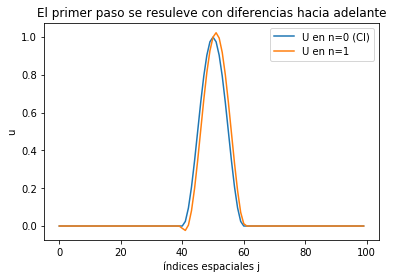

In [4]:
n = 0 
for j in range(1,99): # del 1 al 99
    u2[n+1,j]=u2[n,j]-c*DT/(2*DX)*(u2[n,j+1]-u2[n,j-1])

# Grafica la condición inicial y el primer paso de tiempo
plt.figure(figsize=(6,4))    
plt.plot(u2[0,:], label='U en n=0 (CI)')
plt.plot(u2[1,:], label='U en n=1')
plt.xlabel('índices espaciales j')
plt.ylabel(r'u')
plt.title('El primer paso se resuleve con diferencias hacia adelante')
plt.legend()
plt.show()

A partir del tiempo 2 (índice 1 porque estamos en python) ya podemos usar el esquema de diferencias centradas en tiempo. Además debemos actualizar las condiciones de frontera a cada paso de tiempo. La condición de frontera que estamos usando es **cíclica o periódica** lo cual significa que se iguala la solución en el último y primer punto del dominio:

In [5]:
for n in range(1,99):
    for j in range(1,99):
        u2[n+1,j]=u2[n-1,j]-c*DT/DX*(u2[n,j+1]-u2[n,j-1])
    
    # Condición periódica de frontera
    u2[n+1,0]  = u2[n+1,98]
    u2[n+1,99] = u2[n+1,1]

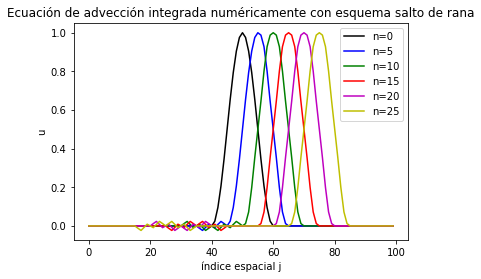

In [6]:
# Grafiquemos la solución a distintos tiempos
fig = plt.figure(figsize=(6,4))
ax = plt.axes()
ax.plot(u2[0,:],'k', label='n=0')
ax.plot(u2[5,:],'b', label='n=5')
ax.plot(u2[10,:],'g', label='n=10')
ax.plot(u2[15,:],'r', label='n=15')
ax.plot(u2[20,:],'m', label='n=20')
ax.plot(u2[25,:],'y', label='n=25')
ax.legend()
ax.set_xlabel('índice espacial j')
ax.set_ylabel('u')
ax.set_title('Ecuación de advección integrada numéricamente con esquema salto de rana')
plt.show()

Acabamos de reproducir la figura 4.2 del capítulo 4 del libro "Basic Numerical Methods in Meteorology and Oceanography". La solución presenta un poco de ruido corriente arriba (lado opuesto de la propagación de la función coseno inicial) pero esas perturbaciones no crecen, por lo que el esquema es estable. 

¿Cómo se vería esta gráfica si tuvieramos $c=-1$ en vez de $c=1$? Pueba cambiar el valor de $c$ para corroborar tu hipótesis.

### Evolución temporal de la  solución

Hagamos una animación para ver cómo evoluciona la solución en el tiempo:

In [7]:
import matplotlib.animation as anim
from IPython.display import HTML
plt.rcParams["animation.html"] = "jshtml"
plt.ioff()

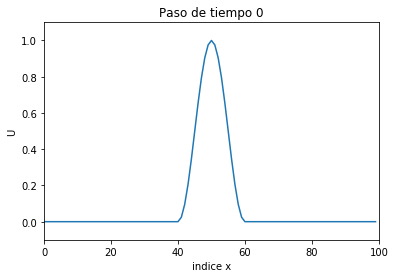

In [8]:
fig = plt.figure(figsize=(6,4))
ax = plt.axes()

def anima_adveccion(tt):
    plt.cla()
    ax.plot(u2[tt,:])
    ax.set_title('Paso de tiempo %d' %tt)
    ax.set_xlabel('indice x')
    ax.set_ylabel('U')
    ax.set_xlim(0,100)
    ax.set_ylim(-0.1,1.1)

animacion =  anim.FuncAnimation(fig, anima_adveccion, frames=99)
animacion

Observa la animación. ¿Cuál es el efecto de la frontera periódica? ¿Se propaga igual el ruido numérico que el coseno inicial? ¿Qué les pasa si $c=-1$?

Una forma de condensar la infromación espacial y temporal de la solción una sola imágen es por medio de un diagrama de Hovmöller. Estos diagamas tienen infromación tempral en un eje y espacial en el otro. El siguiente diagrama nos muestra valores altos (rosas) en donde la solución es más grande, como el máximo del coseno. Conforme nos movemos en el eje y vemos como se propaga la solución y cruza la frontera izquierda alrededor del paso de timepo $n=50$ para volver a entrar por la frontera derecha debido a la condición periódica.

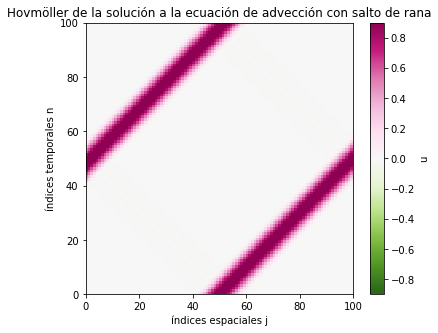

In [9]:
## Graficar el diagrama de Hovmöller
fig = plt.figure(figsize=(6,5))
ax = plt.axes()
pc = plt.pcolormesh(u2, vmin=-0.9, vmax=0.9, cmap='PiYG_r')
cb = plt.colorbar(pc, ax=ax, label='u')
ax.set_xlabel('índices espaciales j')
ax.set_ylabel('índices temporales n')
ax.set_title('Hovmöller de la solución a la ecuación de advección con salto de rana')
plt.show()

## Ejercicio de tarea:
1. Encuentra la solución numérica de la ecuación de advección utilizando el esquema *upwind* u *upstream* (corriente arriba o viento arriba) con $\mu$=1 (pg 38 del libro). Puedes seguir el mismo procedimiento que hicimos en este notebook pero utilizando la discertización adecuada. 
    
    a) Grafica la solución a distintos pasos de tiempo.
    
    b) Haz una animación de la solución para 100 pasos de tiempo.
    
    c) Haz un diagrama de Hovmöller de la solución.
    
    d) Modifica los valores de DX y DT para obtener $\mu=0.5$ y $\mu=1.1$ y repite las instrucciones a, b, c para cada valor de $\mu$. 
    
    e) Explica con tus propias palabras cuál es la diferencia entre las soluciones y cómo el valor de $\mu$ determina la estabilidad del esquema utilizado.